# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [1]:
##from google.colab import drive

#drive.mount('/gdrive')
#%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

## ⚙️ Import Libraries

In [2]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np
import cv2 as cv

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
import keras.layers as tfkl
import keras_cv.layers as tfklcv
from tensorflow.keras.applications import MobileNetV3Large


# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.0


## Show raw data

Índices de las imágenes mostradas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


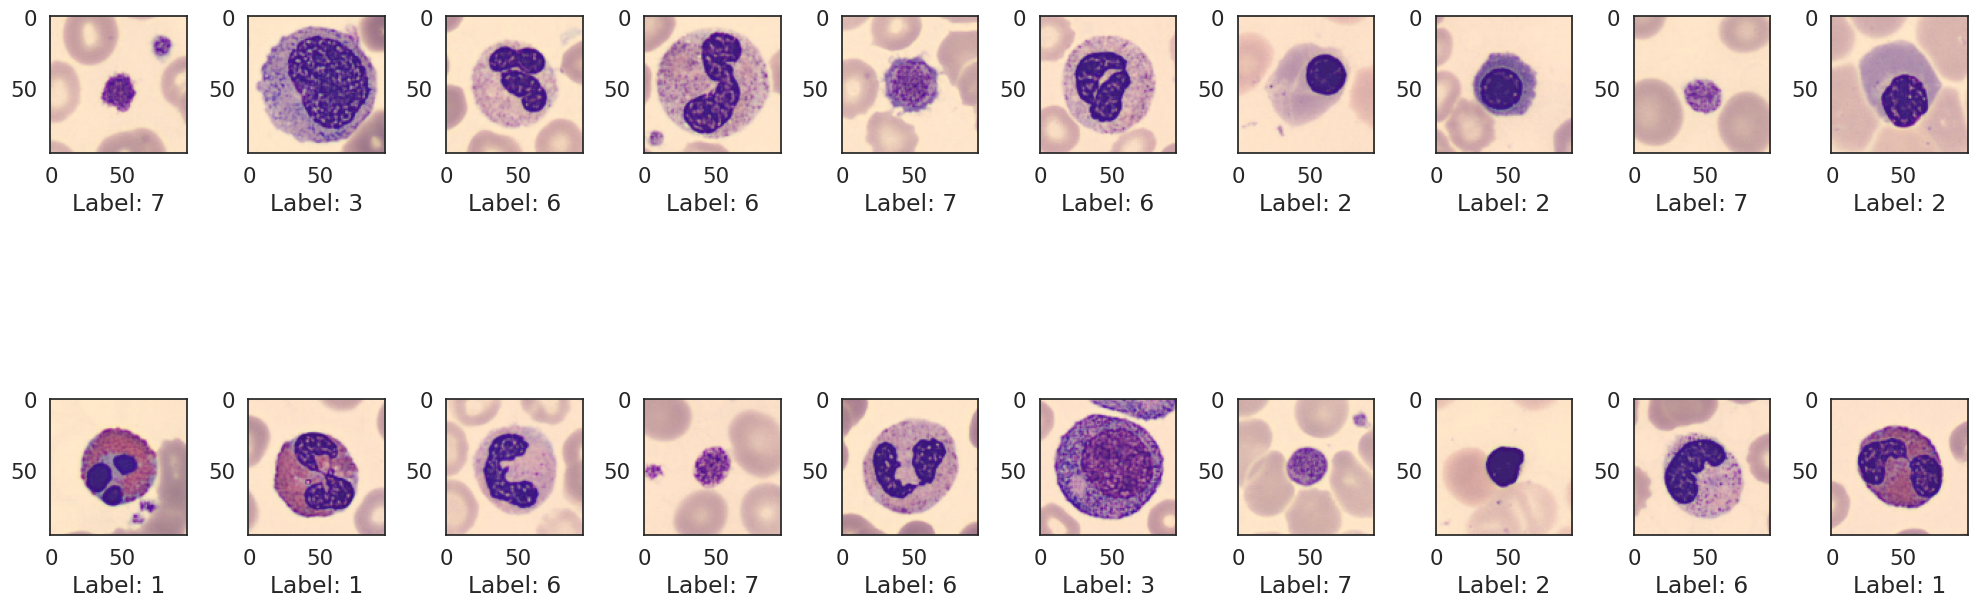

In [3]:
clean_data = np.load('clean_dataset.npz') #data = np.load('training_set.npz')


clean_images = clean_data["images"]
clean_labels = clean_data["labels"]

# Número de imágenes a mostrar
num_img = 20

random_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# Selecciona 10 índices aleatorios
#random_indices = np.random.choice(len(clean_images), num_img, replace=False)

# Imprimir los índices de las imágenes mostradas
print("Índices de las imágenes mostradas:", random_indices)

# Crear subplots para mostrar las imágenes
fig, axes = plt.subplots(2, num_img // 2, figsize=(20, 9))

for i, idx in enumerate(random_indices):
    ax = axes[i // (num_img // 2), i % (num_img // 2)]
    ax.imshow(clean_images[idx])  # Convertir a uint8 para mostrar correctamente
    ax.set_xlabel(f"Label: {clean_labels[idx]}")
    ax.axis('on')  # Opcional: Ocultar los ejes

plt.tight_layout()
plt.show()


## ⏳ Load the Data

In [4]:
clean_data = np.load('clean_dataset.npz') #data = np.load('training_set.npz')


clean_images = clean_data["images"]
clean_labels = clean_data["labels"]

augmented_data = np.load('augmented_dataset.npz')

#Only with augmented for the 0.42 zip
augmented_images = augmented_data["images"]
augmented_labels = augmented_data["labels"]

medium_augmented_data = np.load('augmented_dataset_medium.npz')

medium_augmented_images = augmented_data["images"]
medium_augmented_labels = augmented_data["labels"]

hard_augmented_data = np.load('augmented_dataset_hard.npz')

hard_augmented_images = augmented_data["images"]
hard_augmented_labels = augmented_data["labels"]

# Combinar imágenes y etiquetas
images = np.concatenate((clean_images, augmented_images), axis=0)
images = np.concatenate((images,medium_augmented_images), axis = 0)
images = np.concatenate((images,hard_augmented_images), axis = 0)

labels = np.concatenate((clean_labels, augmented_labels), axis=0)
labels = np.concatenate((labels, medium_augmented_labels), axis=0)
labels = np.concatenate((labels, hard_augmented_labels), axis=0)

print(f"Combined images shape: {images.shape}")
print(f"Combined labels shape: {labels.shape}")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Normalize data with EfficientNet preprocess input
X_train = tfk.applications.efficientnet.preprocess_input(X_train)
X_test =  tfk.applications.efficientnet.preprocess_input(X_test)

# Convert labels to categorical format using one-hot encoding
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

Combined images shape: (47836, 96, 96, 3)
Combined labels shape: (47836,)


## Show rickrolls of ORIGINAL DATASET


In [5]:
'''# Número de imágenes a mostrar
num_img = 2

# Selecciona 10 índices aleatorios
random_indices = [12565, 13632]

# Imprimir los índices de las imágenes mostradas
print("Índices de las imágenes mostradas:", random_indices)

# Crear subplots para mostrar las imágenes
fig, axes = plt.subplots(num_img // 2, 2, figsize=(20, 9))

for i, idx in enumerate(random_indices):
    ax = axes[i]
    ax.imshow(np.clip(images[idx], 0, 255).astype(np.uint8))  # Convertir a uint8 para mostrar correctamente
    ax.set_xlabel(f"Label: {labels[idx]}")
    ax.axis('off')  # Opcional: Ocultar los ejes

plt.tight_layout()
plt.show()  '''

'# Número de imágenes a mostrar\nnum_img = 2\n\n# Selecciona 10 índices aleatorios\nrandom_indices = [12565, 13632]\n\n# Imprimir los índices de las imágenes mostradas\nprint("Índices de las imágenes mostradas:", random_indices)\n\n# Crear subplots para mostrar las imágenes\nfig, axes = plt.subplots(num_img // 2, 2, figsize=(20, 9))\n\nfor i, idx in enumerate(random_indices):\n    ax = axes[i]\n    ax.imshow(np.clip(images[idx], 0, 255).astype(np.uint8))  # Convertir a uint8 para mostrar correctamente\n    ax.set_xlabel(f"Label: {labels[idx]}")\n    ax.axis(\'off\')  # Opcional: Ocultar los ejes\n\nplt.tight_layout()\nplt.show()  '

## Remove rickrolls

In [6]:
'''print(len(images))

# Reshape images if necessary
images_flattened = images.reshape(images.shape[0], -1)

# Convert to list format for DataFrame
df = pd.DataFrame({'images': list(images), 'labels': labels.flatten()})

# Function to compute perceptual hash for an image
def compute_phash(image_array):
    # Reshape image back to its original shape and convert to uint8 if needed
    image_reshaped = image_array.reshape(images.shape[1:]).astype(np.uint8)
    return cv.img_hash.pHash(image_reshaped).tobytes()  # Get a hash as bytes

# Calculate hashes for Shrek and Rickroll
shreck_hash = compute_phash(images[12565])
rickroll_hash = compute_phash(images[13632])

# Calculate the perceptual hash for each image and add it to a new column
df['image_hash'] = df['images'].apply(compute_phash)

# Filter out rows with hashes matching Shrek or Rickroll
df_cleaned = df[~df['image_hash'].isin([shreck_hash, rickroll_hash])].drop(columns=['image_hash']).reset_index(drop=True)

# Convert back to original format for kept data
images = np.array(df_cleaned['images'].tolist())
labels = df_cleaned['labels'].to_numpy()

# Output the number of removed rows for debugging
removed_rows = len(df) - len(df_cleaned)
print(f"Removed {removed_rows} images with Shrek or Rickroll hashes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Normalize data to the range [0, 1]
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')

# Convert labels to categorical format using one-hot encoding
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)



print(len(X_train) + len(X_test))

# Guarda las imágenes y etiquetas en un archivo .npz
output_file = "clean_dataset.npz"
np.savez(output_file, images=images, labels=labels)'''


'print(len(images))\n\n# Reshape images if necessary\nimages_flattened = images.reshape(images.shape[0], -1)\n\n# Convert to list format for DataFrame\ndf = pd.DataFrame({\'images\': list(images), \'labels\': labels.flatten()})\n\n# Function to compute perceptual hash for an image\ndef compute_phash(image_array):\n    # Reshape image back to its original shape and convert to uint8 if needed\n    image_reshaped = image_array.reshape(images.shape[1:]).astype(np.uint8)\n    return cv.img_hash.pHash(image_reshaped).tobytes()  # Get a hash as bytes\n\n# Calculate hashes for Shrek and Rickroll\nshreck_hash = compute_phash(images[12565])\nrickroll_hash = compute_phash(images[13632])\n\n# Calculate the perceptual hash for each image and add it to a new column\ndf[\'image_hash\'] = df[\'images\'].apply(compute_phash)\n\n# Filter out rows with hashes matching Shrek or Rickroll\ndf_cleaned = df[~df[\'image_hash\'].isin([shreck_hash, rickroll_hash])].drop(columns=[\'image_hash\']).reset_index(drop

## Apply Data Augmentation

In [7]:
'''augmentation = tf.keras.Sequential([
    # Rotación aleatoria entre -20° y 20°
    tfkl.RandomRotation(0.2),
    # Traslación aleatoria en un 10% del tamaño de la imagen
    tfkl.RandomTranslation(height_factor=0.1, width_factor=0.1),
    # Escalado aleatorio entre 90% y 110% del tamaño original
    tfkl.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
    # Inversión horizontal (no vertical, para mantener la orientación)
    tfkl.RandomFlip(mode="horizontal"),
    # Ajuste aleatorio del contraste de la imagen
    tfkl.RandomContrast(factor=0.3),
    # Aplicar pequeños ajustes al brillo
    tfkl.RandomBrightness(factor=0.0005),

    
    # Garantizar que el tamaño de salida sea siempre (96, 96, 3)
    tfkl.Resizing(96, 96)
])


random_indices = int(np.random.choice(len(X_train), 1, replace=False))

image = X_train[random_indices]
augmented_image = np.clip(image,0.,1.) #augmented_image = np.clip(augmentation(image),0.,1.)

fig, axes = plt.subplots(1,2,figsize=(20,9))

# Imagen original
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Oculta los ejes para una mejor visualización

# Imagen aumentada
axes[1].imshow(augmented_image)
axes[1].set_title('Augmented Image')
axes[1].axis('off')  # Oculta los ejes

# Mostrar el gráfico
plt.tight_layout()
plt.show()'''


'augmentation = tf.keras.Sequential([\n    # Rotación aleatoria entre -20° y 20°\n    tfkl.RandomRotation(0.2),\n    # Traslación aleatoria en un 10% del tamaño de la imagen\n    tfkl.RandomTranslation(height_factor=0.1, width_factor=0.1),\n    # Escalado aleatorio entre 90% y 110% del tamaño original\n    tfkl.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),\n    # Inversión horizontal (no vertical, para mantener la orientación)\n    tfkl.RandomFlip(mode="horizontal"),\n    # Ajuste aleatorio del contraste de la imagen\n    tfkl.RandomContrast(factor=0.3),\n    # Aplicar pequeños ajustes al brillo\n    tfkl.RandomBrightness(factor=0.0005),\n\n    \n    # Garantizar que el tamaño de salida sea siempre (96, 96, 3)\n    tfkl.Resizing(96, 96)\n])\n\n\nrandom_indices = int(np.random.choice(len(X_train), 1, replace=False))\n\nimage = X_train[random_indices]\naugmented_image = np.clip(image,0.,1.) #augmented_image = np.clip(augmentation(image),0.,1.)\n\nfig, axes = plt.subplo

## CV Augmentation

In [8]:
'''clean_data = np.load('clean_dataset.npz') #data = np.load('training_set.npz')


images = clean_data["images"]
labels = clean_data["labels"]

# Define las transformaciones de aumentación
cv_augmentation = tf.keras.Sequential([
    tfklcv.AugMix(
        value_range=(0, 255),
        severity=0.9,
        num_chains=1,
        chain_depth=[1, 3],
    ),
    tfklcv.RandAugment(
        value_range=(0, 255),
        augmentations_per_image=1,
        magnitude=0.9,
    ),
])

# Inicializa listas para las imágenes y etiquetas aumentadas
augmented_images = []
augmented_labels = []

# Aplica las transformaciones y guarda las etiquetas originales
for i in range(len(images)):
    image = images[i]
    label = labels[i]
    
    # Aplica aumentación
    augmented_image = cv_augmentation(tf.expand_dims(image, axis=0))[0]
    augmented_images.append(augmented_image.numpy())  # Convierte a numpy para guardar
    augmented_labels.append(label)  # Convierte la etiqueta a numpy

# Convierte las listas a arrays numpy
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Guarda las imágenes y etiquetas en un archivo .npz
output_file = "augmented_dataset_hard.npz"
np.savez(output_file, images=augmented_images, labels=augmented_labels)

# Visualiza una imagen aleatoria del dataset aumentado
random_index = np.random.randint(len(augmented_images))
original_image = images[random_index]
augmented_image = augmented_images[random_index]
label = augmented_labels[random_index]

# Mostrar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.clip(original_image, 0, 255).astype(np.uint8))
axes[0].set_title(f"Original Image (Label: {labels[random_index]})")
axes[0].axis('off')

axes[1].imshow(np.clip(augmented_image, 0, 255).astype(np.uint8))
axes[1].set_title(f"Augmented Image (Label: {label})")
axes[1].axis('off')

plt.show()

print(f"Augmented dataset saved as: {output_file}")'''

'clean_data = np.load(\'clean_dataset.npz\') #data = np.load(\'training_set.npz\')\n\n\nimages = clean_data["images"]\nlabels = clean_data["labels"]\n\n# Define las transformaciones de aumentación\ncv_augmentation = tf.keras.Sequential([\n    tfklcv.AugMix(\n        value_range=(0, 255),\n        severity=0.9,\n        num_chains=1,\n        chain_depth=[1, 3],\n    ),\n    tfklcv.RandAugment(\n        value_range=(0, 255),\n        augmentations_per_image=1,\n        magnitude=0.9,\n    ),\n])\n\n# Inicializa listas para las imágenes y etiquetas aumentadas\naugmented_images = []\naugmented_labels = []\n\n# Aplica las transformaciones y guarda las etiquetas originales\nfor i in range(len(images)):\n    image = images[i]\n    label = labels[i]\n    \n    # Aplica aumentación\n    augmented_image = cv_augmentation(tf.expand_dims(image, axis=0))[0]\n    augmented_images.append(augmented_image.numpy())  # Convierte a numpy para guardar\n    augmented_labels.append(label)  # Convierte la et

## Make AGUMENTED DATA

In [9]:
'''data = np.load('augmented_dataset.npz')

images = data["images"]
labels = data["labels"]

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize data to the range [0, 1]
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')

# Convert labels to categorical format using one-hot encoding
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

print(len(images))'''


'data = np.load(\'augmented_dataset.npz\')\n\nimages = data["images"]\nlabels = data["labels"]\n\nX_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)\n\n# Normalize data to the range [0, 1]\nX_train = (X_train / 255).astype(\'float32\')\nX_test = (X_test / 255).astype(\'float32\')\n\n# Convert labels to categorical format using one-hot encoding\ny_train = tfk.utils.to_categorical(y_train)\ny_test = tfk.utils.to_categorical(y_test)\n\nprint(len(images))'

## ⏳ Inspect Data

Índices de las imágenes mostradas: [44808 20882 41646 29138  9536 12859 42361 33079  5055 15207   501 41261
 36452  7155 21822 45873 43948 45470 27849 27231]


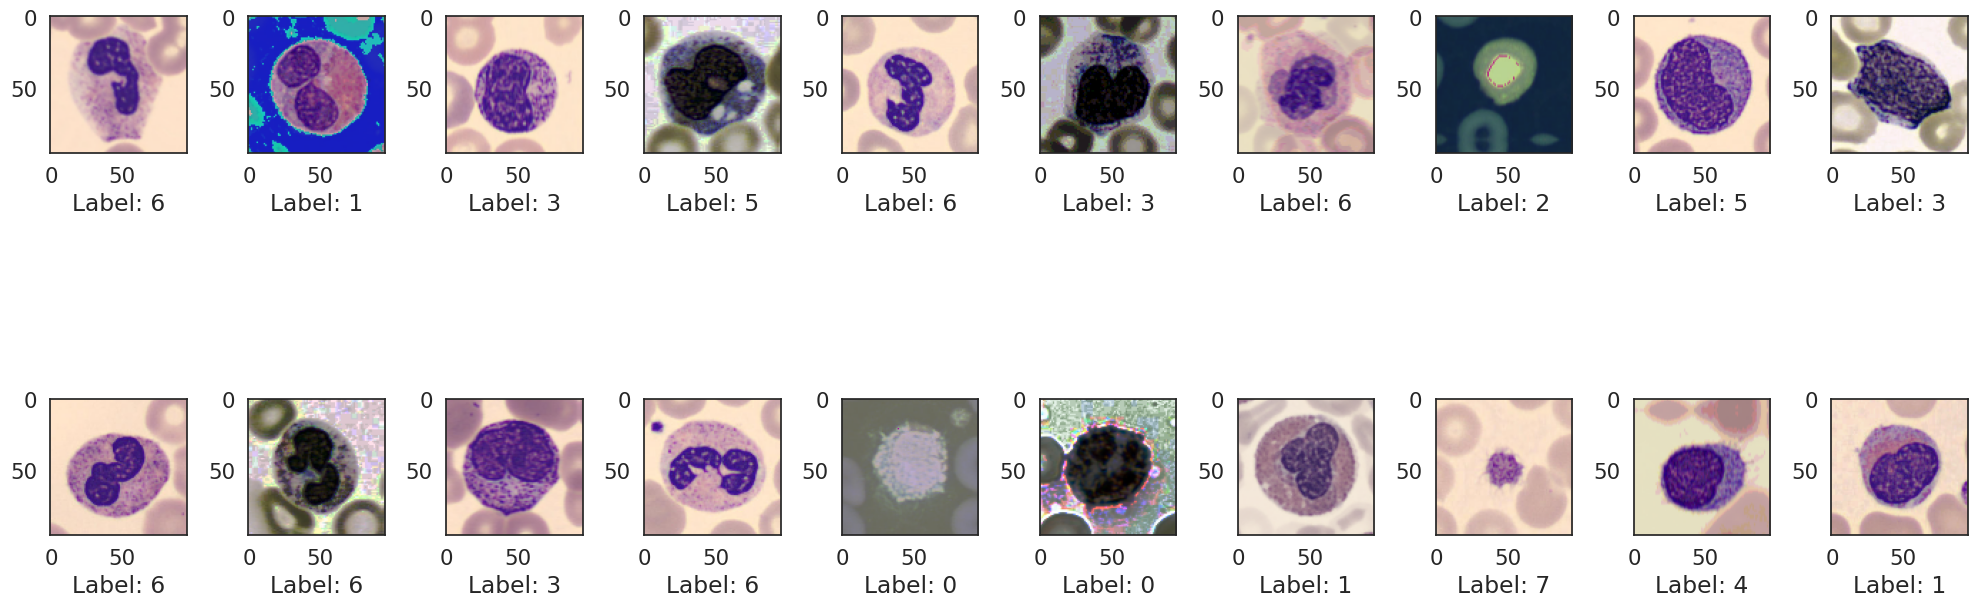

In [10]:
# Número de imágenes a mostrar
num_img = 20

# = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# Selecciona 10 índices aleatorios
random_indices = np.random.choice(len(images), num_img, replace=False)

# Imprimir los índices de las imágenes mostradas
print("Índices de las imágenes mostradas:", random_indices)

# Crear subplots para mostrar las imágenes
fig, axes = plt.subplots(2, num_img // 2, figsize=(20, 9))

for i, idx in enumerate(random_indices):
    ax = axes[i // (num_img // 2), i % (num_img // 2)]
    ax.imshow(np.clip(images[idx], 0, 255).astype(np.uint8))  # Convertir a uint8 para mostrar correctamente
    ax.set_xlabel(f"Label: {labels[idx]}")
    ax.axis('on')  # Opcional: Ocultar los ejes

plt.tight_layout()
plt.show()


## 🧮 Define Network Parameters

In [11]:
# Number of training epochs
epochs = 1000

# Batch size for training
batch_size = 32

# Learning rate: step size for updating the model's weights
learning_rate = 0.0001

## 🛠️ Define the Model

In [12]:
def build_model(
    input_shape=(96, 96, 3),  # Tamaño ajustado para capturar más detalles
    output_shape=8,
    learning_rate=learning_rate,  # Define un valor inicial de tasa de aprendizaje
):
    tf.random.set_seed(42)

    # Cargar EfficientNetB7 preentrenado en ImageNet
    base_model = tf.keras.applications.EfficientNetV2S(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape,
    )

    # Congelar capas iniciales y descongelar últimas para fine-tuning
    for layer in base_model.layers[:int(len(base_model.layers) * 0.7)]:
        layer.trainable = False
    for layer in base_model.layers[int(len(base_model.layers) * 0.7):]:
        layer.trainable = True

    # Definir la entrada y aplicar aumento de datos
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    data_augmentation = tf.keras.Sequential([
        tfkl.RandomFlip('horizontal'),
        tfkl.RandomRotation(0.1),
        tfkl.RandomZoom(0.1),
        tfkl.RandomContrast(0.1),
        tfkl.GaussianNoise(0.05),  # Añadir ruido gaussiano
    ], name='data_augmentation')

    x = data_augmentation(input_layer)
    x = base_model(x, training=True)

    # Global Pooling + Capas Completamente Conectadas
    x = tfkl.GlobalAveragePooling2D(name='global_avg_pool')(x)
    x = tfkl.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-4), name='dense_1')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.4)(x)
    x = tfkl.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-4), name='dense_2')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.4)(x)
    output_layer = tfkl.Dense(output_shape, activation='softmax', name='Output')(x)
    # Crear el modelo
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='EfficientNetB7FineTuningModel')

    # Compilar con Lion o AdamW
    loss = tf.keras.losses.CategoricalCrossentropy()
    optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-5)  # Alternativa a Lion
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    return model

# Construir el modelo con las formas de entrada y salida especificadas
model = build_model()

# Mostrar un resumen de la arquitectura del modelo
model.summary()

I0000 00:00:1732304771.110828  222633 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732304771.153893  222633 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732304771.153969  222633 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732304771.158947  222633 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732304771.158995  222633 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "EfficientNetB7FineTuningModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 3, 3, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,694,760 (78.94 MB)

 Trainable params: 10,744,072 (40.99 MB)

 Non-trainable params: 9,950,688 (37.96 MB)

## 🧠 Train the Model

In [13]:
# Define the patience value for early stopping
patience = 25

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

# Definir el scheduler para reducir la tasa de aprendizaje
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitorizar la pérdida de validación
    factor=0.55,           # Reducir la tasa de aprendizaje a la mitad
    patience=5,           # Esperar 5 épocas sin mejora
    min_lr=1e-9           # Tasa de aprendizaje mínima
)

# Añadirlo a los callbacks existentes
callbacks.append(lr_scheduler)


In [14]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# Añade los pesos al entrenamiento
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    class_weight = class_weights
)

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history.history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'weights.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/1000


W0000 00:00:1732304843.138733  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.160424  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.166317  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.174541  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.188525  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.198053  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.514761  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.520845  223031 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304843.525279  223031 gp

1046/1047 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4448 - loss: 1.8272

W0000 00:00:1732304949.755332  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.756243  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.756711  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.757164  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.757588  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.758061  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.758558  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.759025  223045 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304949.759547  223045 gp

1047/1047 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4449 - loss: 1.8267

W0000 00:00:1732304964.546961  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.547949  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.548405  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.548844  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.549270  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.549714  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.550201  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.550674  223049 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732304964.551173  223049 gp

1047/1047 ━━━━━━━━━━━━━━━━━━━━ 146s 113ms/step - accuracy: 0.4451 - loss: 1.8261 - val_accuracy: 0.8546 - val_loss: 0.4803 - learning_rate: 1.0000e-04
Epoch 2/1000
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 114s 109ms/step - accuracy: 0.7934 - loss: 0.6817 - val_accuracy: 0.8926 - val_loss: 0.3707 - learning_rate: 1.0000e-04
Epoch 3/1000
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 125s 119ms/step - accuracy: 0.8495 - loss: 0.5247 - val_accuracy: 0.9125 - val_loss: 0.3089 - learning_rate: 1.0000e-04
Epoch 4/1000
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.8715 - loss: 0.4474 - val_accuracy: 0.9308 - val_loss: 0.2605 - learning_rate: 1.0000e-04
Epoch 5/1000
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 124s 119ms/step - accuracy: 0.8889 - loss: 0.3949 - val_accuracy: 0.9343 - val_loss: 0.2479 - learning_rate: 1.0000e-04
Epoch 6/1000
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 118s 113ms/step - accuracy: 0.9026 - loss: 0.3489 - val_accuracy: 0.9441 - val_loss: 0.2223 - learning_rate: 1.0000e-04
Epoch 7/1000
1047/1047 ━━━━━━

## Plot

99.83
99.02


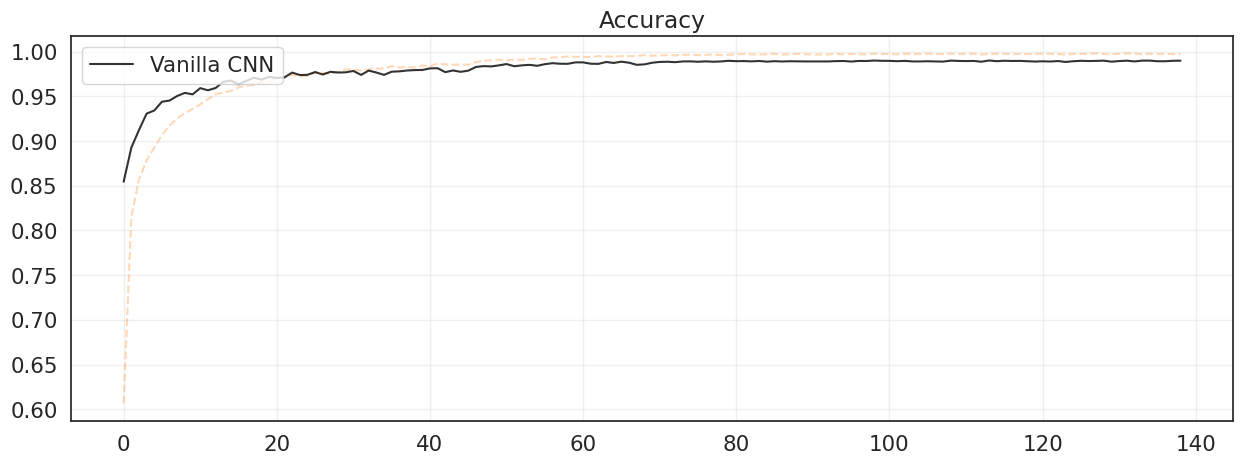

In [18]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Vanilla CNN', alpha=.8, color='#000000')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

print(round(max(history.history['accuracy'])* 100, 2))
print(round(max(history.history['val_accuracy'])* 100, 2))

plt.show()

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [19]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        X =  tfk.applications.efficientnet.preprocess_input(X)
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [20]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

  adding: model.py (deflated 54%)
  adding: weights.keras (deflated 8%)
